In [1]:
#!/usr/bin/env Rscript
#setwd('analysis')
##########################
library(scales)
library(plyr)
library(Seurat)
library(dplyr)
library(patchwork)
library(ggplot2)
library(cowplot)
library("viridis")  
library(RColorBrewer)
library("viridis")
library(Matrix)
library(readxl)
library(caTools)
library(randomForest)

library("ggpubr")

Attaching SeuratObject


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


필요한 패키지를 로딩중입니다: viridisLite


다음의 패키지를 부착합니다: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




In [2]:
# Reading Datafile and Metadata

data=readRDS('../Data_BBB/brain.BBB.human.vascular.final.Jan2022.rds')
meta=readRDS('../Data_BBB/brain.BBB.human.vascular.final.Jan2022.metadata.rds')
patient_info=read_excel('../Data_BBB/SampleInfo_BBB_Age_and_sex.xlsx')
brain=CreateSeuratObject(counts = data, project = "BBB", meta.data=meta,min.cells = 1, min.features = 1)






Warning message in CreateSeuratObject.default(counts = data, project = "BBB", meta.data = meta, :
“Some cells in meta.data not present in provided counts matrix”


In [4]:
# Make CD19 expression Label 
CD19exp <- FetchData(object = brain, vars = c('CD19'))
CD19label <- lapply(CD19exp, function(x) {
  ifelse(x > 0, "CD19_pos", "CD19_neg")
})
  
brain$CD19exp <- CD19label



In [52]:
my_list <-list()
patient_ids <- as.list(unique(meta$PatientID))

for (i in 1:length(patient_ids)) {
    A= subset(brain, subset= PatientID ==patient_ids[i])
    my_list[i] <- length(which(A$CD19exp=='CD19_pos'))/length((A$CD19exp))

}



#sorted_indices <- order(unlist(my_list))
#my_list <- my_list[sorted_indices]
#patient_ids <- patient_ids[sorted_indices]


BVE Sequencing ID,Whole Sequencing ID,Gender,Age on day of surgery,CD19exp
<chr>,<chr>,<chr>,<dbl>,<list>
D20-125061,D20-169015,F,22.5,0
D20-125062,NA,M,19.0,0.004347826
D20-125063,NA,M,11.4,0.003745318
D20-125064,D20-169013,F,21.7,0
D20-125065,D20-169014,M,17.3,0.003797468
D20-125066,NA,M,11.7,0
D20-125067,NA,M,11.8,0.006779661
D20-125068,D20-169011,M,15.8,0
D20-125069,D20-169012,M,17.4,0.001545595


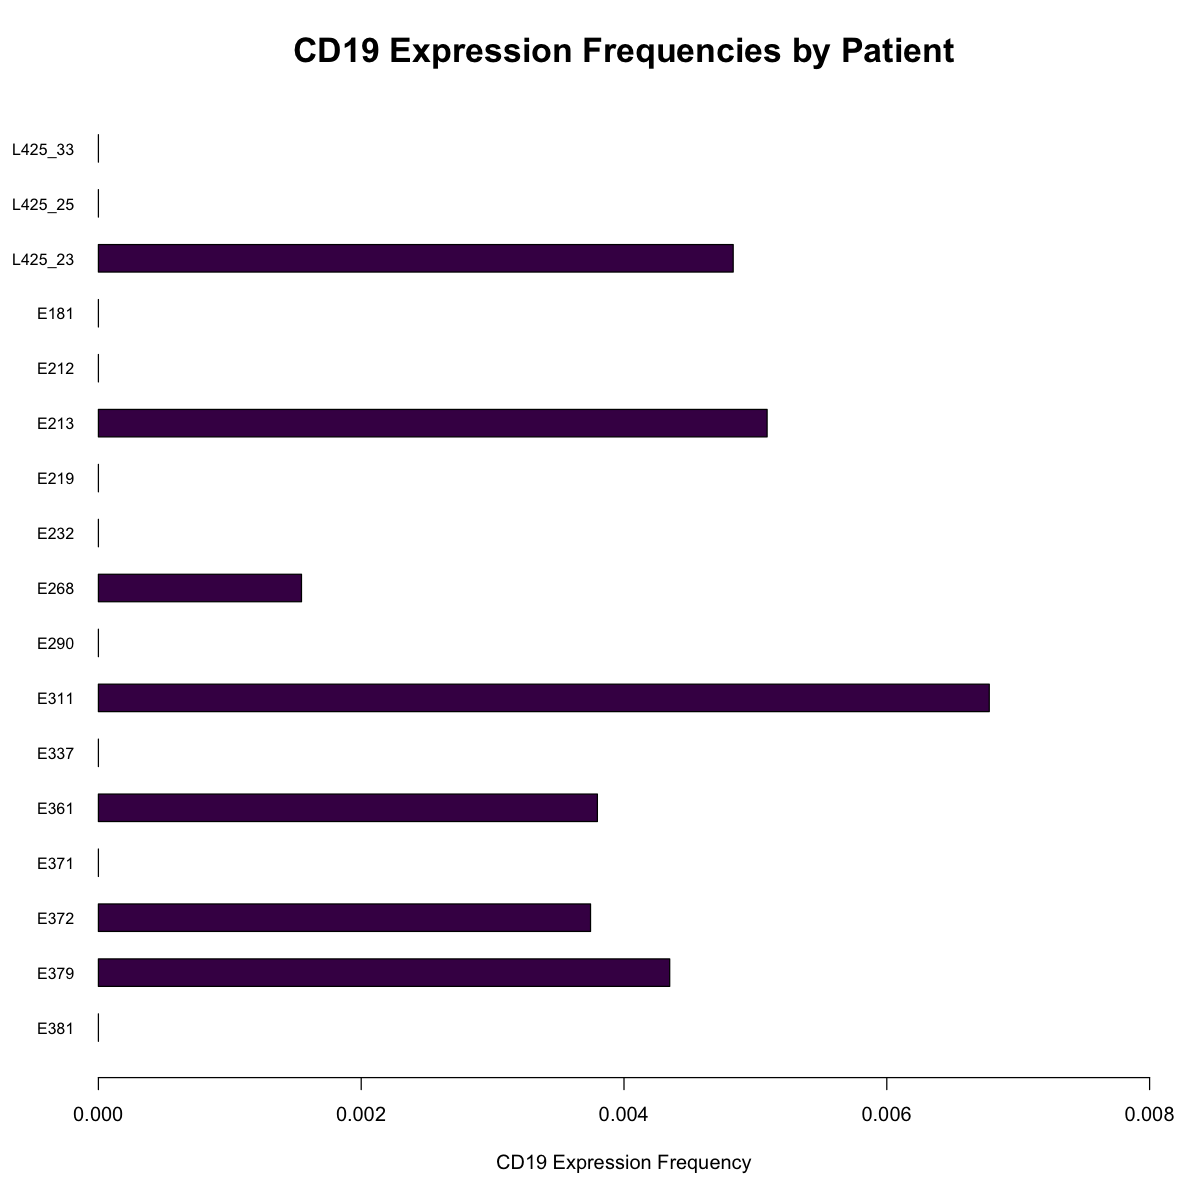

In [36]:

# Create a vector of patient IDs
#patient_ids <- unique(meta$PatientID)

options(repr.plot.width=10, repr.plot.height=10)
data_bar <-  unlist(my_list)                   # Extract values
names(data_bar) <- patient_ids

# Create a bar plot of CD19 expression frequencies
#jpeg(file="../Figures/CD19ExpressionByPatients.jpeg")
barplot(data_bar, names.arg = patient_ids, xlab = "CD19 Expression Frequency", main = "CD19 Expression Frequencies by Patient", col = viridis(1),xlim = c(0, 0.008),las=1,horiz=TRUE, space=1,  cex.names=0.8, cex.main=1.7, cex.sub=2)
#dev.off()



In [110]:
patient_info$CD19exp

[[1]]
[1] 0

[[2]]
[1] 0.004347826

[[3]]
[1] 0.003745318

[[4]]
[1] 0

[[5]]
[1] 0.003797468

[[6]]
[1] 0

[[7]]
[1] 0.006779661

[[8]]
[1] 0

[[9]]
[1] 0.001545595

[[10]]
[1] 0

[[11]]
[1] 0

[[12]]
[1] 0.005089059

[[13]]
[1] 0

[[14]]
[1] 0

[[15]]
[1] 0.004830918

[[16]]
[1] 0

[[17]]
[1] 0

In [147]:
#rbind(patient_info,t(my_list))
patient_info$CD19exp<-(my_list)


In [154]:
str(patient_info)

'data.frame':	17 obs. of  5 variables:
 $ BVE Sequencing ID    : chr  "D20-125061" "D20-125062" "D20-125063" "D20-125064" ...
 $ Whole Sequencing ID  : chr  "D20-169015" NA NA "D20-169013" ...
 $ Gender               : num  1 0 0 1 0 0 0 0 0 0 ...
 $ Age on day of surgery: num  22.5 19 11.4 21.7 17.3 11.7 11.8 15.8 17.4 14.8 ...
 $ CD19exp              : num  0 0.00435 0.00375 0 0.0038 ...


In [183]:
patient_info=read_excel('../Data_BBB/SampleInfo_BBB_Age_and_sex.xlsx')
patient_info<-as.data.frame(patient_info)
patient_info$CD19exp<-as.numeric(my_list)
#patient_info$CD19exp<-ifelse(my_list>0, 0, 1)
#patient_info$Gender <- ifelse(patient_info$Gender == "M", 0, 1)
patient_info$Age <- ifelse(patient_info$"Age on day of surgery" > 16, "<16", ">16")
patient_info

BVE Sequencing ID,Whole Sequencing ID,Gender,Age on day of surgery,CD19exp,Age
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
D20-125061,D20-169015,F,22.5,0.000000000,<16
D20-125062,NA,M,19.0,0.004347826,<16
D20-125063,NA,M,11.4,0.003745318,>16
D20-125064,D20-169013,F,21.7,0.000000000,<16
D20-125065,D20-169014,M,17.3,0.003797468,<16
D20-125066,NA,M,11.7,0.000000000,>16
D20-125067,NA,M,11.8,0.006779661,>16
D20-125068,D20-169011,M,15.8,0.000000000,>16
D20-125069,D20-169012,M,17.4,0.001545595,<16


Age,count,mean,sd
<chr>,<int>,<dbl>,<dbl>
<16,10,0.001961087,0.002272808
>16,7,0.001503568,0.002713122


            Df    Sum Sq   Mean Sq F value Pr(>F)
Gender       1 8.680e-06 8.681e-06   1.572  0.229
Residuals   15 8.284e-05 5.523e-06               

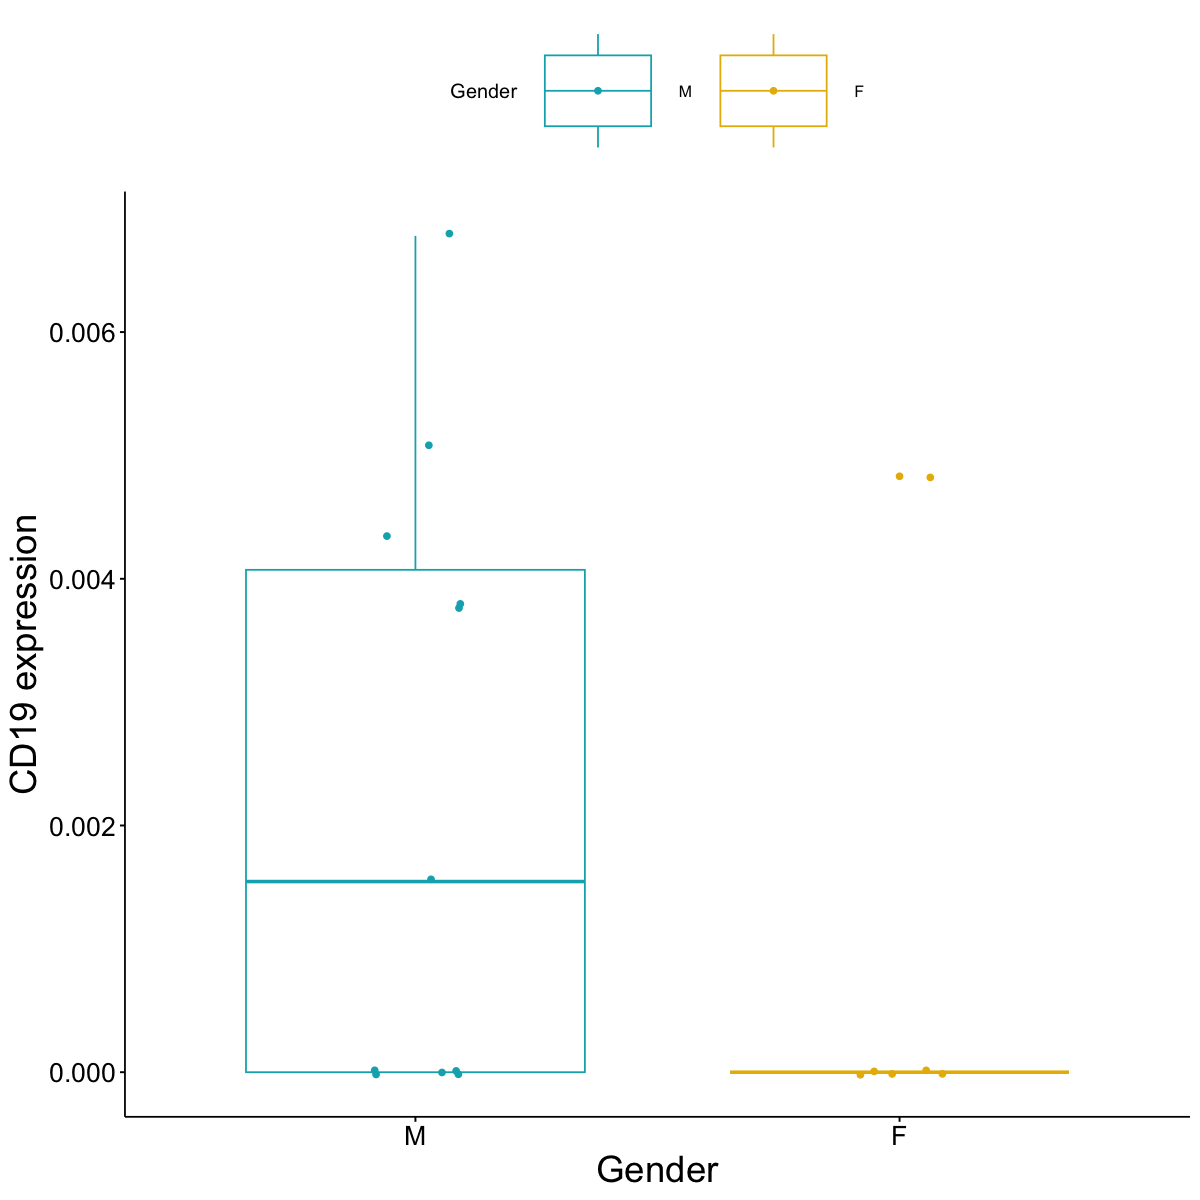

In [204]:
group_by(patient_info, Age) %>%
  summarise(
    count = n(),
    mean = mean(CD19exp, na.rm = TRUE),
    sd = sd(CD19exp, na.rm = TRUE)
  )

res.aov <- aov(CD19exp ~ Gender, data = patient_info)
# Summary of the analysis
summary(res.aov)

p<- ggboxplot(patient_info, x = "Gender", y = "CD19exp", 
          color = "Gender", palette = c("#00AFBB", "#E7B800"),
          order = c("M", "F"),
          ylab = "CD19 expression", xlab = "Gender", cex.names=0.8, cex.main=3.7, cex.sub=5)

p+ 
 font("caption", size = 30)+
 font("xlab", size = 22)+
 font("ylab", size = 22)+
 font("xy.text", size = 16)+
 theme(legend.key.size = unit(3, 'cm'))+
 geom_jitter(aes(color=Gender), width=0.1) 

            Df    Sum Sq   Mean Sq F value Pr(>F)
Age          1 8.600e-07 8.620e-07   0.143  0.711
Residuals   15 9.066e-05 6.044e-06               

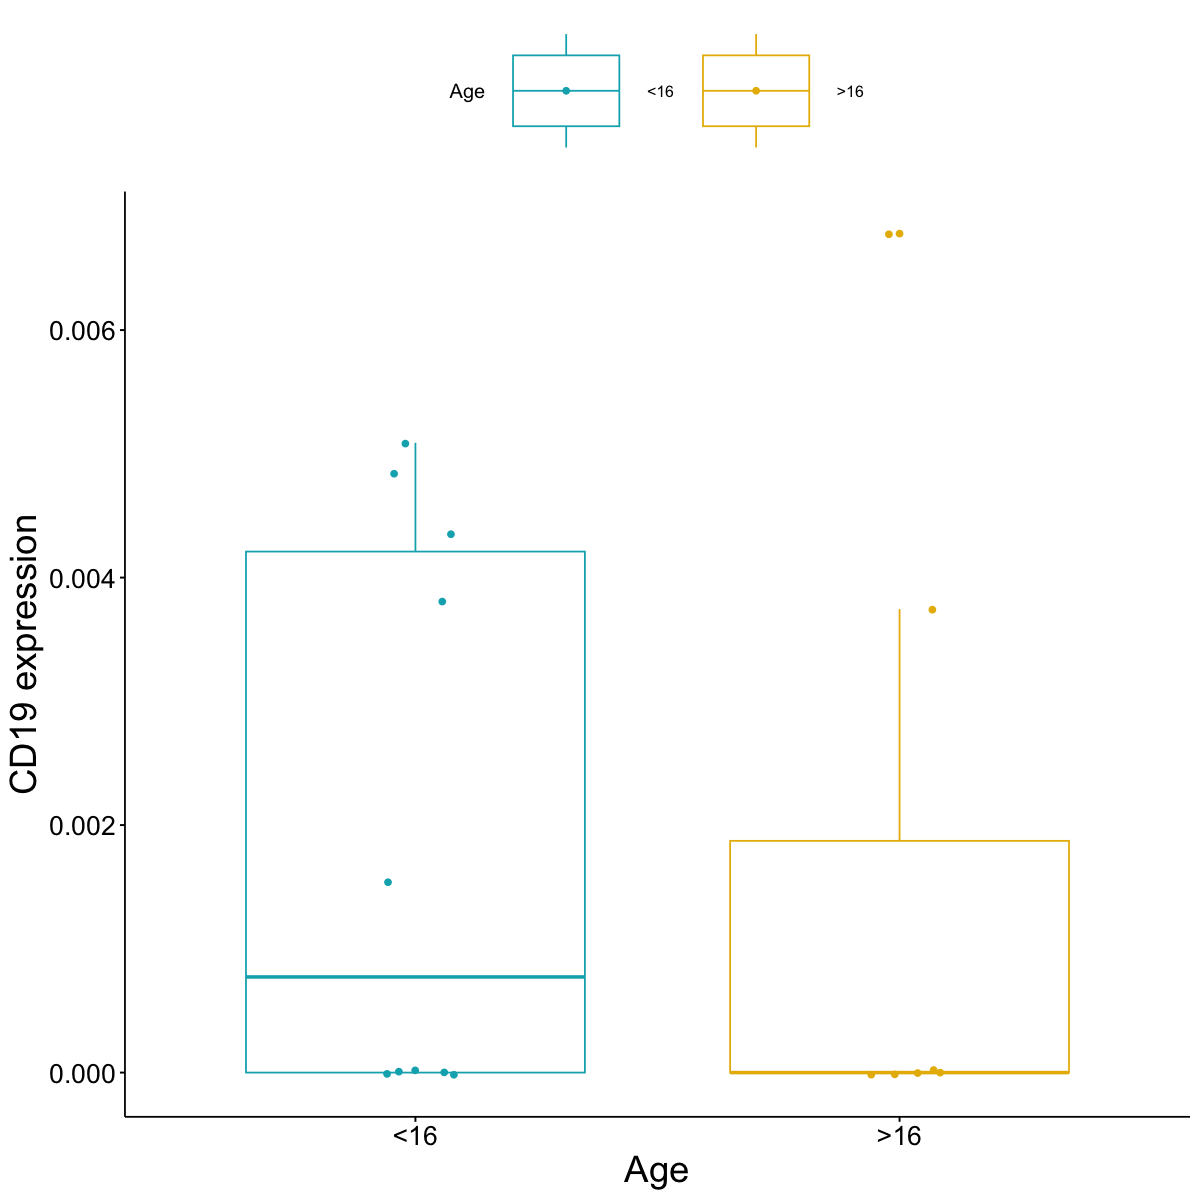

In [205]:
res.aov <- aov(CD19exp ~ Age, data = patient_info)
# Summary of the analysis
summary(res.aov)

p<- ggboxplot(patient_info, x = "Age", y = "CD19exp", 
          color = "Age", palette = c("#00AFBB", "#E7B800"),
          order = c("<16", ">16"),
          ylab = "CD19 expression", xlab = "Age", cex.lab=1.5, cex.names=1.8, cex.main=2, cex.sub=2)


p+ 
 font("caption", size = 30)+
 font("xlab", size = 22)+
 font("ylab", size = 22)+
 font("xy.text", size = 16)+
 theme(legend.key.size = unit(3, 'cm'))+
 geom_jitter(aes(color=Age), width=0.1) 

In [ ]:
# random forest

# Splitting data in train and test data
split <- sample.split(patient_info, SplitRatio = 0.7)
split
  
train <- subset(patient_info, split == "TRUE")
test <- subset(patient_info, split == "FALSE")
  
# Fitting Random Forest to the train dataset
set.seed(120)  # Setting seed
classifier_RF = randomForest(x = train[-5],
                             y = train$Species,
                             ntree = 500)
  
classifier_RF
  
# Predicting the Test set results
y_pred = predict(classifier_RF, newdata = test[-5])
  
# Confusion Matrix
confusion_mtx = table(test[, 5], y_pred)
confusion_mtx
  
# Plotting model
plot(classifier_RF)
  
# Importance plot
importance(classifier_RF)
  
# Variable importance plot
varImpPlot(classifier_RF)

In [22]:

# Create a vector of patient IDs
#patient_ids <- unique(meta$PatientID)

options(repr.plot.width=8, repr.plot.height=8)
data_bar <-  c(2,1,2,9)               # Extract values
names(data_bar) <- c('Endo', 'SMC', 'Fib', 'Per')      

# Create a bar plot of CD19 expression frequencies
jpeg(file="../Figures/CD19ExpressionByCelltypes_absCount.jpeg")
barplot(data_bar, xlab = "CD19 Expression Frequency",ylab = "cell count", main = "CD19 Expression Frequencies by Cell type", col = viridis(1), space=1,  cex.names=1.8, cex.main=2, cex.sub=2)
dev.off()

#, names.arg = patient_ids, xlab = "Patient ID", ylab = "CD19 Expression Frequency", main = "CD19 Expression Frequencies by Patient")


pdf 
  2

In [21]:

# Create a vector of patient IDs
#patient_ids <- unique(meta$PatientID)

options(repr.plot.width=8, repr.plot.height=8)
data_bar <-  c(0.000903750564844103,2/ 830, 4/ 1552,18/ 3128)               # Extract values
names(data_bar) <- c('Endo', 'SMC', 'Fib', 'Per')      
jpeg(file="../Figures/CD19ExpressionByCelltypes_relCount.jpeg")
barplot(data_bar, xlab = "CD19 Expression Frequency",ylab = "relative cell count", main = "CD19 Expression Frequencies by Cell type", col = viridis(1), space=1,  cex.names=1.8, cex.main=2, cex.sub=2)
dev.off()

pdf 
  2

In [20]:
sum_data = rowSums(data)
sum_data=sum_data/sum(sum_data)*10^6
jpeg(file="../Figures/CD19ExpressionCounts_byRNA.jpeg")
hist(log10(sum_data), breaks = 35, col = "#C0C0C0", border = "black",  main = "Gene counts per million", xlab = "log10(gene count) per million", ylab = "Frequency", freq=FALSE, cex.lab=1.5, cex.names=1.8, cex.main=2, cex.sub=2 )
dev.off()

Warning message in plot.window(xlim, ylim, "", ...):
“"cex.names"는 그래픽 매개변수가 아닙니다”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"cex.names"는 그래픽 매개변수가 아닙니다”
Warning message in axis(1, ...):
“"cex.names"는 그래픽 매개변수가 아닙니다”
Warning message in axis(2, at = yt, ...):
“"cex.names"는 그래픽 매개변수가 아닙니다”


pdf 
  2